# Forest Fire Prediction

### Data Description and Cleaning

Import Libraries

In [430]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Import Dataset

In [431]:
df = pd.read_csv('ForestFire.csv')
# df['Fire Occurrence'] = df['Fire Occurrence'].replace([0,1],['Safe','Fire'],inplace=True)

DataFrame Shape

In [432]:
df.shape

(39, 5)

Sample

In [433]:
df.sample(5)

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
17,California,12,45,90,0
28,Rabat,1,32,70,0
35,Hiroshima,60,60,10,1
27,Capetown,11,20,59,0
1,Bangalore,50,30,10,1


Description

In [434]:
df.describe()

,Oxygen,Temperature,Humidity,Fire Occurrence
count,39.000000,39.000000,39.000000,39.000000
mean,33.846154,33.794872,36.282051,0.512821
std,23.734872,16.225677,28.046905,0.506370
min,0.000000,0.000000,0.000000,0.000000
25%,11.500000,20.000000,13.500000,0.000000
50%,30.000000,35.000000,30.000000,1.000000
75%,50.000000,45.000000,62.500000,1.000000
max,89.000000,60.000000,100.000000,1.000000


NaN Value Count

In [435]:
df.isnull().sum()

Area               0
Oxygen             0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64

###### Hence no missing value analysis required

DataFrame Split

In [436]:
df['Fire Occurrence'] = df['Fire Occurrence'].replace(to_replace=[0,1],value=['Safe','Danger'])
X = df
Y = df['Fire Occurrence']
X.drop(['Area','Fire Occurrence'],inplace=True,axis=1)

### Exploratory Analysis

Correlation Analysis

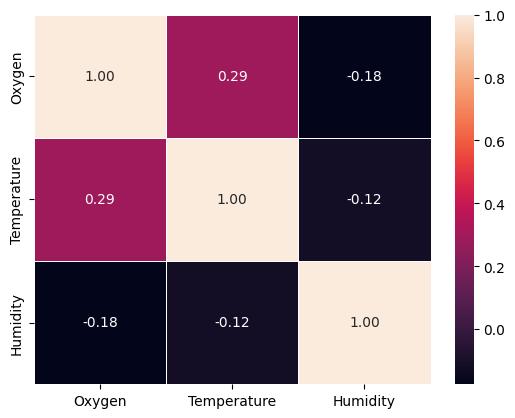

In [437]:
sb.heatmap(X.corr(method='pearson'), xticklabels=X.corr().columns, yticklabels=X.corr().columns,annot=True,fmt=".2f",linewidth=.5)
plt.show()

### Model Building

#### K-Neighbors Classifier

In [438]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")

Predicted Accuracy: 75.0%


Prediction

In [439]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Danger']


Confusion Matrix

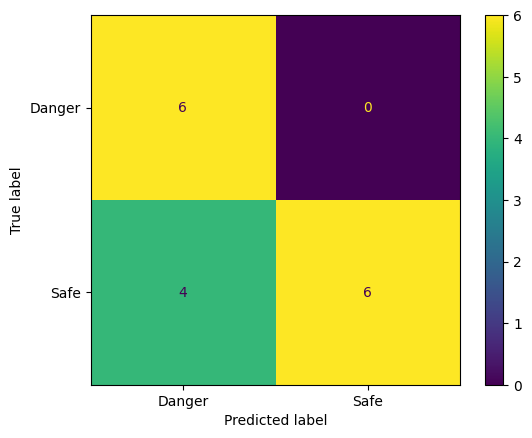

In [440]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Decision Tree Classifier

In [441]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")

Predicted Accuracy: 87.5%


Predict

In [442]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Danger']


Confusion Matrix

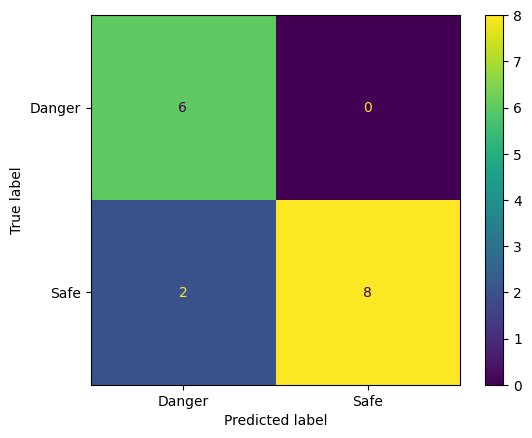

In [443]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Random Forest Classifier

In [444]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(2)*100}%")

Predicted Accuracy: 94.0%


Predict

In [445]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Danger']


Confusion Matrix

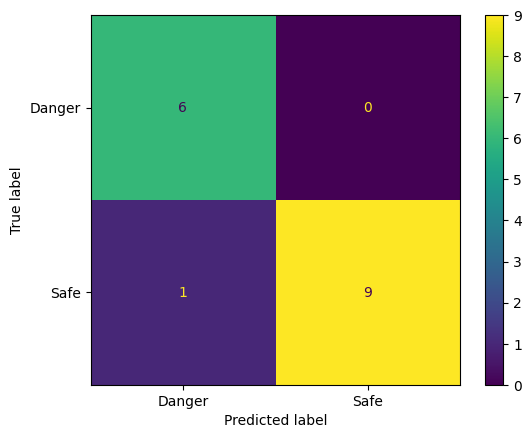

In [446]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()